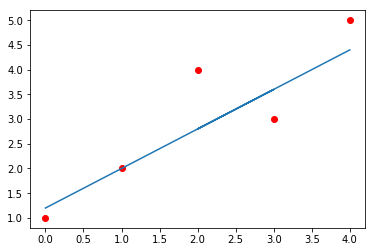

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.7999999999999998, 4.3999999999999995]
RMSE: 0.693


In [1]:
# Standalone simple linear regression example
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
 
##########################################
# Plot linear regression
##########################################
def simple_linear_regression(train, test):
	predictions = list()
	x_arr = list()
	b0, b1 = coefficients(train)
	for row in test:
		x = row[0]
		yhat = b0 + b1 * x
		predictions.append(yhat)
		x_arr.append(x)
	plt.plot(test, 'ro')
	plt.plot([x - 1 for x in x_arr], [pr  for pr in predictions])
	plt.show()
	return predictions
 
##########################################
# Compute linear regression
##########################################
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	print(predicted)
	actual = [row[-1] for row in dataset]
	rmse = rmse_metric(actual, predicted)
	return rmse, predicted

##########################################
# Test data
##########################################
dataset = np.array([[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]])

##########################################
# Output
##########################################
rmse, predicted = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))
